# **Problem Defination**


it is a classification problem to predict the probability of match label in range from 0 to 1, to know the date will success or not

# **Input Data**

set of features such as gender , income ,id ...

# **Output Data**

the output is the probability of match for every sample

# **Required Function**

classification problem 

# **Challenges**

1- the data contain many null values in column , and we must clean the the null values 

2- there are high correlation between features

3- data imbalance between class 0 and class 1

# **The Impact**

make the people meet their suitable partners in speed date event


# **The Solution**

building set of machine learning model such as Random Forest , XGBoost and SVC  and get the best hyperparameters using set of techniques such as Grid Search , Random Search 

# **Experimental Protocol**

1- import the required libraries

2- reading the data

3- discover the data 

4- make preprocessing such as drop columns that contain many null values 

5- replace the column that contain a few null values with mean or mode based on the data type of feature 

6- make set of pipeline 
  

*   one pipeline for numerical feature and make scaling process on data
*   one pipeline for categorical features and make one hot encoding on data
*   merge two pipeline 
*   build set of pipline for different classifier

7- get the best hyperparameters using set of techniques such as Grid Search , Random Search  

8- make prediction on test data



## **Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**

* Simple linear regression model without using activation function is not good for classification task because it cannot produce binary classification outputs. A linear regression model predicts only continuous numerical values based on the input features, while in classification tasks, we need to categorize the input data into discrete classes.
*  Perceptron and Logistic Regression models are specifically designed for classification tasks. They use an activation function, such as a step function or sigmoid function, to map the output of the linear model to a binary classification output. The step function used in Perceptron model produces a binary output directly, while the sigmoid function used in Logistic Regression model produces a probability score that can be thresholded to produce a binary output.



# **What's a decision tree and how it is different to a logistic regression model?**



* decision tree is a  supervised learning approach used for classification and regression tasks . Internal nodes represent tests on features, branching to following nodes based on the test results, while leaf nodes provide the class label or regression output.
* logistic regression model is a type of linear model used for binary classification tasks. use  logistic or sigmoid function to map the linear combination of the features to a probability score between 0 and 1.
*  another difference between them , decision tree is non-linear classifier but decision is linear classifier, logistic work well with  continous data but decision tree work well with categorical data




# **What's the difference between grid search and random search?**

Grid Search and Random Search are techniques used for find the best hyperparameters , the difference between them how each technique search on hyperparameters space .

* Grid Search : creates a list of all possible combinations of hyperparameters and evaluates the model performance using cross-validation for each combination. Grid search is a deterministic approach and guarantees to find the best hyperparameters within the specified grid.
*   Random Search : selects hyperparameters from the distribution and evaluates the model performance using cross-validation. Random search is a stochastic approach, and the number of hyperparameter combinations sampled depends on the number of iterations specified.

# **What's the difference between bayesian search and random search?**

* Bayesian search use the result of the previous iteration  by the sequential model-based optimisation process to determine the value of the subsequent hyperparameter.
* random search is selecting random different combination to train the model, Bayesian search is faster than random search

# **Import Libraries**

In [ ]:
# import the libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC

# **Read Data**

In [ ]:
# read the data (train and test )
train=pd.read_csv('/content/match/train.csv')  
test= pd.read_csv('/content/match/test.csv')

# **Explore The Data**

In [ ]:
# show train data
train

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583.0
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830.0
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840.0
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508.0
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,1,24,2,14,20,19,19.0,13,14,354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5930.0
2955,1,24,2,7,16,14,5.0,10,4,145.0,...,9.0,8.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,121.0
2956,0,15,2,15,19,14,14.0,5,14,410.0,...,8.0,8.0,7.0,7.0,6.0,7.0,7.0,6.0,7.0,7476.0
2957,0,21,2,2,16,8,NaN,11,3,42.0,...,6.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,4408.0


In [ ]:
# show test data 
test

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
2465,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
2466,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
2467,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937


In [ ]:
# save match column from train data
match_in_train = train['match'] 

In [ ]:
#drop match column from train data
train.drop(['match'],axis=1,inplace=True)

In [ ]:
# concat train and test together  
data = pd.concat([train,test],axis = 0)

In [ ]:
#show the data after concatination
data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583.0
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830.0
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840.0
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508.0
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982.0
2465,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299.0
2466,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818.0
2467,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937.0


In [ ]:
# get the shape of train data
train.shape

(2959, 191)

In [ ]:
# get the shape of test data
test.shape

(2469, 191)

In [ ]:
# get the shape of data(train+test)
data.shape

(5428, 191)

In [ ]:
# show the number of null values in each column in data
# there are many column contain many null values 
data.isnull().sum().sort_values()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc7_2     4170
amb7_2      4170
expnum      4282
numdat_3    4467
num_in_3    4993
Length: 191, dtype: int64

In [ ]:
# the total number of null values in data
data.isnull().sum().sum()

279679

# **Clean Data**

In [ ]:
# Calculate the percentage of null values in each column
null_rate_in_each_column_in_data = (data.isnull().sum() / len(data))

In [ ]:
# drop column if the column have more than 40% are null
data = data.dropna(thresh=len(data)*0.6, axis=1) 

In [ ]:
# the number of null values in data after drop set of columns
data.isnull().sum().sum()

46543

In [ ]:
#count null values in each column after drop set of feature
data.isnull().sum().sort_values()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
fun4_2      1665
intel4_2    1665
sinc4_2     1665
fun2_2      1665
attr2_2     1665
Length: 120, dtype: int64

In [ ]:
# drop the irrelevant features
data = data.drop(['field','pid','idg', 'zipcode'],axis=1)

In [ ]:
# get the correlation between features
cor_matrix = data.corr().abs()

In [ ]:
# show the correlation
cor_matrix

,gender,condtn,wave,round,position,positin1,order,partner,int_corr,samerace,...,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,id
gender,1.000000,0.003110,0.005577,0.025675,0.005474,0.000538,0.007901,0.007773,0.018230,0.007138,...,0.259061,0.126026,0.359049,0.181204,0.074841,0.144081,0.116063,0.098299,0.014788,0.014062
condtn,0.003110,1.000000,0.208676,0.812845,0.326885,0.307583,0.319236,0.314278,0.029313,0.088723,...,0.012266,0.013454,0.069743,0.014924,0.005133,0.011081,0.044201,0.002339,0.002940,0.022257
wave,0.005577,0.208676,1.000000,0.234173,0.082841,0.079513,0.092257,0.083519,0.028946,0.003550,...,0.282516,0.021202,0.325563,0.232416,0.013137,0.008763,0.025549,0.074086,0.073058,0.015127
round,0.025675,0.812845,0.234173,1.000000,0.389907,0.377914,0.402357,0.387119,0.000281,0.050547,...,0.075158,0.021400,0.093500,0.022791,0.018789,0.022472,0.054482,0.003603,0.026962,0.015401
position,0.005474,0.326885,0.082841,0.389907,1.000000,0.723813,0.164913,0.175268,0.006246,0.048402,...,0.045677,0.085250,0.031369,0.062193,0.036824,0.038301,0.041131,0.069878,0.053553,0.025142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sinc3_2,0.144081,0.011081,0.008763,0.022472,0.038301,0.148907,0.009578,0.008146,0.001816,0.005612,...,0.043956,0.075159,0.016599,0.141157,0.236207,1.000000,0.383983,0.293755,0.207932,0.012827
intel3_2,0.116063,0.044201,0.025549,0.054482,0.041131,0.017283,0.028445,0.027748,0.005798,0.078025,...,0.176207,0.008129,0.071772,0.008964,0.370967,0.383983,1.000000,0.310787,0.366714,0.004629
fun3_2,0.098299,0.002339,0.074086,0.003603,0.069878,0.092300,0.011708,0.006061,0.025236,0.005976,...,0.049454,0.005276,0.065448,0.072168,0.431847,0.293755,0.310787,1.000000,0.354582,0.006702
amb3_2,0.014788,0.002940,0.073058,0.026962,0.053553,0.004744,0.015825,0.008688,0.006210,0.006899,...,0.084972,0.003729,0.007450,0.113032,0.310566,0.207932,0.366714,0.354582,1.000000,0.005229


In [ ]:
# Get the highly correlated feature pairs and drop it
# if there are correlation between two feature more than 0.8 , drop one of them
threshold = 0.80
high_corr_pairs = [(column_1, column_2) for column_1 in cor_matrix.columns for column_2 in cor_matrix.columns if cor_matrix.loc[column_1, column_2] > threshold and column_1 != column_2]

# Drop one of the highly correlated features
for column_1, column_2 in high_corr_pairs:
    if column_1 in data.columns and column_2 in data.columns:
        if data[column_1].dtype == 'float64':
            if data[column_1].std() > data[column_2].std():
                data = data.drop(column_2, axis=1)
            else:
                data = data.drop(column_1, axis=1)
        else:
            data = data.drop(column_2, axis=1)

# Display the resulting dataframe
print(data)

      gender  condtn  wave  position  positin1  order  partner  int_corr  \
0          0       2    14         2       2.0     14       12     -0.03   
1          1       1     3         2       NaN      8        8      0.21   
2          1       1    13         8       8.0     10       10      0.43   
3          1       2     9        18      13.0      6        7      0.72   
4          1       2    14         6       6.0     20       17      0.33   
...      ...     ...   ...       ...       ...    ...      ...       ...   
2464       0       2    15        18      18.0     14       11      0.74   
2465       0       1    13         4       4.0      4        8       NaN   
2466       1       2     2         3       NaN     15        3     -0.13   
2467       0       2     9        11      11.0      9        2      0.43   
2468       1       2    21        22       7.0     16        5      0.34   

      samerace  age_o  ...  intel2_2  fun2_2  amb2_2  shar2_2  attr3_2  \
0            

In [ ]:
# the number of null values in data after drop set of columns based on correlation 
data.isnull().sum().sum() 

45730

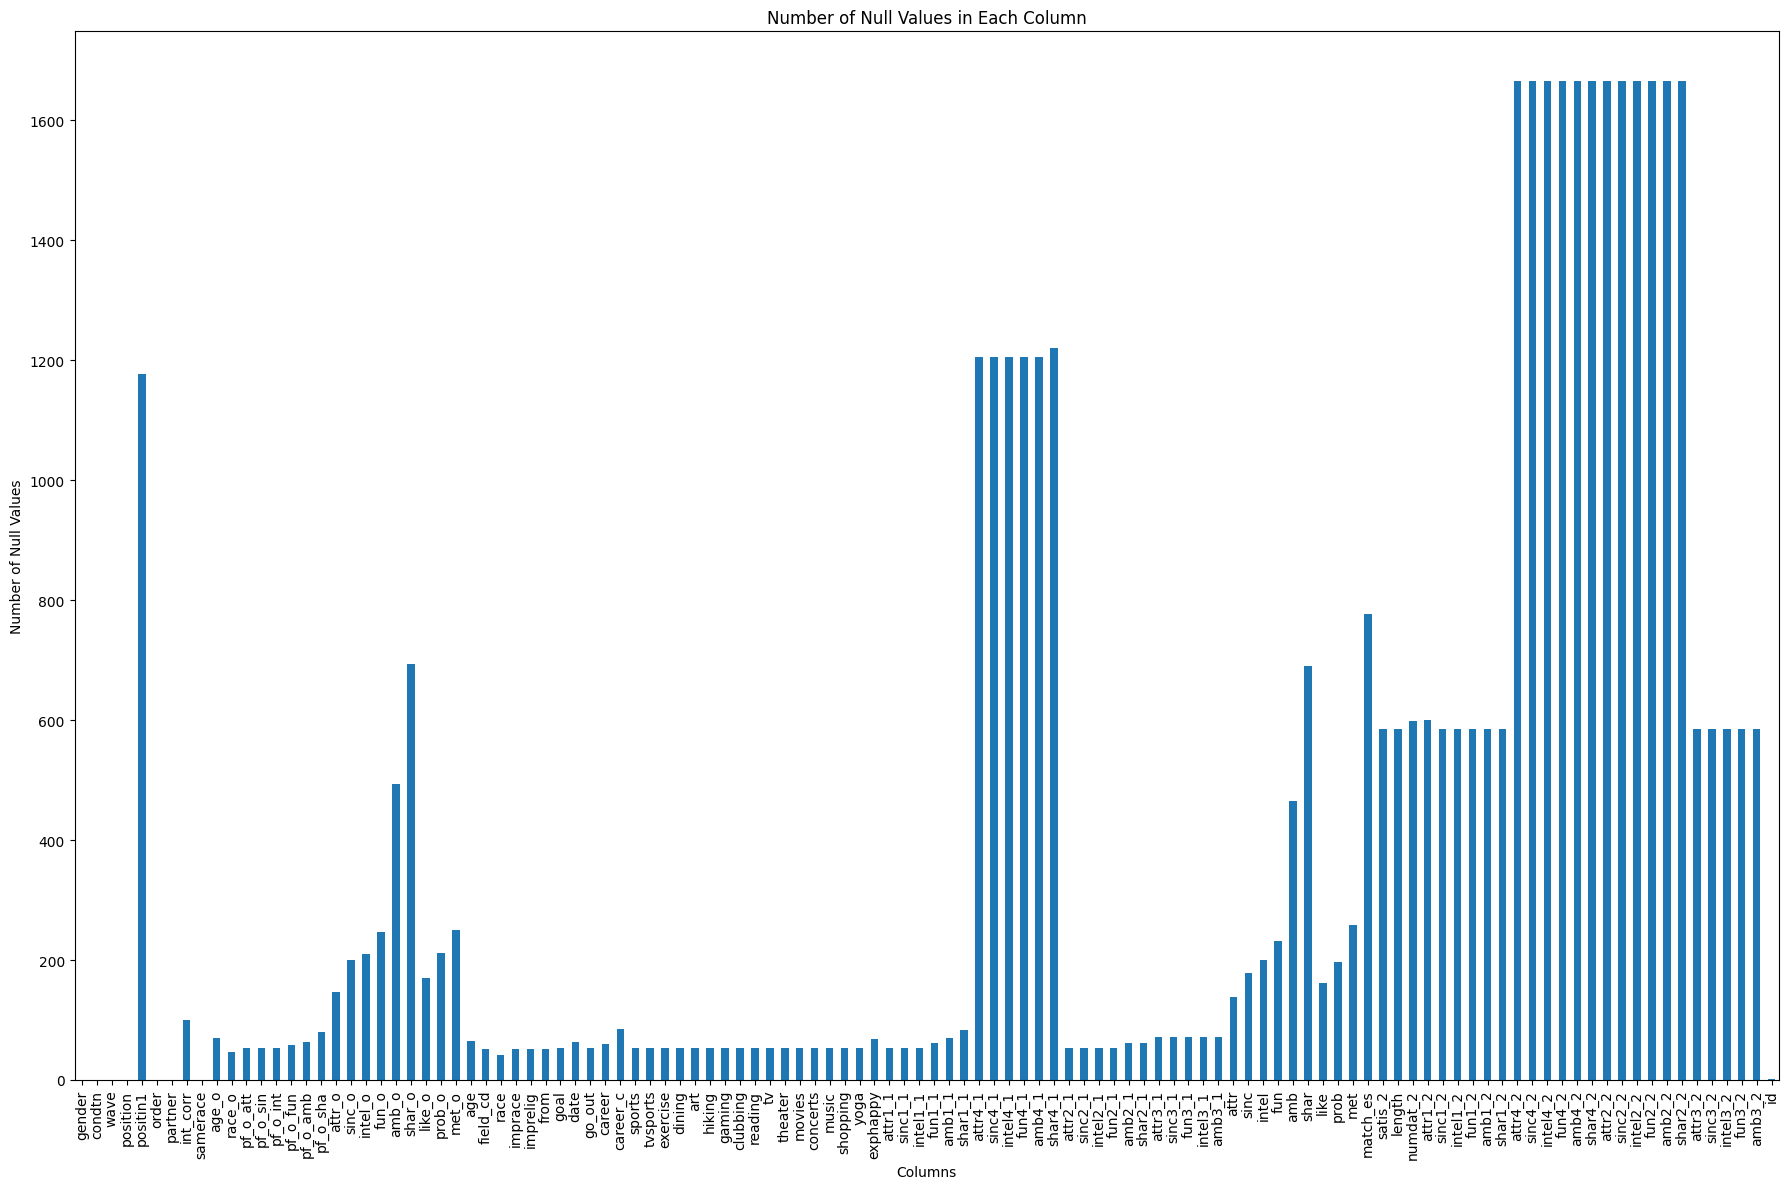

In [ ]:
# Calculate the number of null values in each column
null_counts = data.isnull().sum()

# Plot the null values in each column
plt.figure(figsize=(18, 12))
# Set the plot title and axis labels
null_counts.plot(kind='bar')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#6 in race feature means other, so I filled null values in this column with 6
data.race = data.race.fillna(6)
#same with race column
data.race_o = data.race.fillna(6)
#6 in goal feature means other, so I filled null values in this column with 6
data['goal'] = data['goal'].fillna(6)
#18 in field coded feature means other, so I filled null values in this column with 18
data['field_cd'] = data['field_cd'].fillna(18)
#18 in career coded feature means other, so I filled null values in this column with 15.0
data['career_c'] = data['career_c'].fillna(15.0)

In [ ]:
# select numerical feature
numerical_features =data.select_dtypes(include=['float64','int64']).columns

In [ ]:
# select categorical feature
categorical_features = data.select_dtypes(include=['object']).columns

In [ ]:
#show numerical feature
numerical_features 

Index(['gender', 'condtn', 'wave', 'position', 'positin1', 'order', 'partner',
       'int_corr', 'samerace', 'age_o',
       ...
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2',
       'intel3_2', 'fun3_2', 'amb3_2', 'id'],
      dtype='object', length=112)

In [ ]:
#show categorical feature
categorical_features 

Index(['from', 'career'], dtype='object')

# **Split Data**

In [ ]:
# split the data into X , Y
# X represent features
# Y represent target
X=data.iloc[:train.shape[0],:]
Y=match_in_train

In [ ]:
# show target 
Y

0       0
1       0
2       0
3       0
4       0
       ..
2954    1
2955    0
2956    0
2957    0
2958    0
Name: match, Length: 2959, dtype: int64

In [ ]:
# show features
X

,gender,condtn,wave,position,positin1,order,partner,int_corr,samerace,age_o,...,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,id
0,0,2,14,2,2.0,14,12,-0.03,0,27.0,...,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,2583.0
1,1,1,3,2,NaN,8,8,0.21,0,24.0,...,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,6830.0
2,1,1,13,8,8.0,10,10,0.43,0,34.0,...,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,4840.0
3,1,2,9,18,13.0,6,7,0.72,1,25.0,...,17.02,17.02,17.02,12.77,8.0,9.0,8.0,8.0,7.0,5508.0
4,1,2,14,6,6.0,20,17,0.33,0,27.0,...,10.00,10.00,20.00,10.00,7.0,8.0,9.0,9.0,8.0,4828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,1,2,14,19,19.0,13,14,0.54,1,22.0,...,10.00,10.00,20.00,10.00,7.0,8.0,9.0,9.0,8.0,5930.0
2955,1,2,7,14,5.0,10,4,-0.11,1,24.0,...,16.67,16.67,14.58,14.58,8.0,9.0,8.0,7.0,7.0,121.0
2956,0,2,15,14,14.0,5,14,-0.62,1,27.0,...,20.00,15.00,15.00,15.00,7.0,8.0,8.0,7.0,8.0,7476.0
2957,0,2,2,8,NaN,11,3,0.47,0,23.0,...,NaN,NaN,NaN,NaN,8.0,6.0,8.0,8.0,8.0,4408.0


# **Pipline For Numerical**

In [ ]:
# pipline for numerical
# make standard scalar on numerical data
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# **pipline for categorical**

In [ ]:
# pipline for categorical
# replace null value with the most frequent
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# **merging two pipline**

In [ ]:
# merging two pipline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, numerical_features),
        ('cat', transformer_categorical, categorical_features)
    ]
)

# **Pipline for Random Forest Classifier**

In [ ]:
# pipline for Random Forest Classifier

pipline_forest = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier()
        )
    ]
)

# **Pipline for XGBoost Classifier**

In [ ]:
# pipline for XGBClassifier 
pipline_xgbost = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)

# **Pipline for Logistic Classifier**

In [ ]:
# pipline for logistic 
pipline_logistic = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
          LogisticRegression(),
        )
    ]
)

# **1- Grid Search using Random Forest Classifier**

In [ ]:
"""
1- Define set the hyperparameters 
2- pass these hyperparameters to grid search with another parameters such as cv,verbose 
3- grid search get the best hyperparameters 
4- train the random forest model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  n_estimators , max_features ,imputer__strategy
2- I think the model will fit well with these hyperparameters and will get high score
"""

"""
my plan is  building XGBoost model using Grid search
""" 

param_grid_forest = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators':[550,650,750],
    'my_classifier__max_features':[25,28,30],
           }

# Create the GridSearchCV object
grid_forest = GridSearchCV(pipline_forest, param_grid_forest, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# Fit the pipeline to the data
grid_forest.fit(X, Y)
print('best score {}'.format(grid_forest.best_score_))
print('best score {}'.format(grid_forest.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.860873311826111
best score {'my_classifier__max_features': 30, 'my_classifier__n_estimators': 750, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# Make predictions using the pipeline
y_pred_grid_forest = grid_forest.predict(X)

In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_forest.predict_proba(test)[:,1]

submission.to_csv('result_1.csv', index=False)

# **2- Grid Search using XGBoost Classifier**

In [ ]:
"""
1- Define set the hyperparameters 
2- pass these hyperparameters to grid search with another parameters such as cv,verbose 
3- grid search get the best hyperparameters 
4- train xgboost model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  n_estimators , max_depth ,imputer__strategy,learning_rate
2- I think the model will fit well compared to grid search with random forest 
"""

"""
my plan is  building random forest model using randomized search
"""
param_grid_xgbost = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__max_depth': [15,17],
               'my_classifier__n_estimators': [700,800],
               'my_classifier__learning_rate': [0.1]

               
 }
# Create the GridSearchCV object
grid_xgbost = GridSearchCV(pipline_xgbost, param_grid_xgbost, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

# Fit the pipeline to the data
grid_xgbost.fit(X, Y)

print('best score {}'.format(grid_xgbost.best_score_))
print('best score {}'.format(grid_xgbost.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
best score 0.8685985369807451
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 17, 'my_classifier__n_estimators': 700, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# Make predictions using the pipeline
y_pred_xgbost_grid = grid_xgbost.predict(X)

In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_xgbost.predict_proba(test)[:,1]

submission.to_csv('result_2.csv', index=False)

# **3- Randomized Search using Random Forest**

In [ ]:


"""
1- Define set the hyperparameters 
2- pass these hyperparameters to randomize search with another parameters such as cv,verbose 
3- randomize search get the best hyperparameters 
4- train random forest model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  n_estimators , max_features ,imputer__strategy
2- I think the model will fit well but the score will less than the score of xgboost using grid search because 
randmized search not make all combination but grid make all combination
"""

"""
my plan is  building xgboost model using randomized search
"""


param_random_forest = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators':[550,650,750],
    'my_classifier__max_features':[25,28,30],
           }
random_search_random = RandomizedSearchCV( 
    pipline_forest, param_random_forest, cv=10, verbose=1, n_jobs=-1, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

random_search_random.fit(X, Y)

print('best score {}'.format(random_search_random.best_score_))
print('best score {}'.format(random_search_random.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8610908974373789
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 650, 'my_classifier__max_features': 30}


In [ ]:
# Make predictions using the pipeline
y_pred_forest_random = random_search_random.predict(X)

In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = random_search_random.predict_proba(test)[:,1]

submission.to_csv('result_3.csv', index=False)

# **4- Randomized Search using XGBoost Forest**

In [ ]:
"""
1- Define set the hyperparameters 
2- pass these hyperparameters to randomize search with another parameters such as cv,verbose 
3- randomize search get the best hyperparameters 
4- train xgboost model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  n_estimators , max_features ,imputer__strategy
2- I think the model will fit well compared with randomize search using random forest model
"""

"""
my plan is  building svm model using bayesian  search
"""
param_forest_xgbost = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators':[550,650,750],
    'my_classifier__max_features':[25,28,30],
           }
random_search_xgbost = RandomizedSearchCV( 
    pipline_xgbost, param_forest_xgbost, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

random_search_xgbost.fit(X, Y)

print('best score {}'.format(random_search_xgbost.best_score_))
print('best score {}'.format(random_search_xgbost.best_params_))



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[21:40:37] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

best score 0.8750532635257635
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 550, 'my_classifier__max_features': 25}


In [ ]:
# Make predictions using the pipeline
y_pred_xgbost_random = random_search_random.predict(X)

In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = random_search_xgbost.predict_proba(test)[:,1]

submission.to_csv('result_4.csv', index=False)

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 11.7 MB/s eta 0:00:00




# **5-Bayesian Search Using SVM**

In [ ]:
# Let's try this with SVM model
"""
1- Define set the hyperparameters 
2- pass these hyperparameters to Bayes search with another parameters such as cv,n_iter 
3- Bayes search get the best hyperparameters 
4- train svm model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  gamma , kernel ,degree,C
2- I think the model will fit , but the score will less than all previous score
"""

"""
my plan is  building logistic model using grid search
"""
SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced', probability=True))
    ]
)


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=10,
)

bayes_search.fit(X, Y)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
best score 0.8361808483179901
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


In [ ]:
# Make predictions using the pipeline
y_pred_bayes = bayes_search.predict(X)

In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = bayes_search.predict_proba(test)[:,1]

submission.to_csv('result_5.csv', index=False)



# **Grid Search using Logistic Classifier**

In [ ]:
"""
1- Define set the hyperparameters 
2- pass these hyperparameters to grid search with another parameters such as cv,verbose 
3- grid search get the best hyperparameters 
4- train logistic model using best hyperparameters and evalute based on roc_auc
5- get the best score and the best parameters 
"""

"""
thoughts and observations
1- I used set of hyperparameters  such as  solver ,penalty,C
2- I think the model will fit compared with Bayes search
"""
param_grid_logistic = {
   'my_classifier__C': [0.1, 1, 10],
    'my_classifier__penalty': ['l1', 'l2'],
    'my_classifier__solver': ['liblinear', 'saga']          
 }



# Create the GridSearchCV object
grid_logistic = GridSearchCV(pipline_logistic, param_grid_logistic, cv=5, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

# Fit the pipeline to the data
grid_logistic.fit(X, Y)

print('best score {}'.format(grid_logistic.best_score_))
print('best score {}'.format(grid_logistic.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best score 0.8629641724902285
best score {'my_classifier__C': 0.1, 'my_classifier__penalty': 'l2', 'my_classifier__solver': 'liblinear'}


In [ ]:
# save submission file that contain id of test data and the probability of match label
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_logistic.predict_proba(test)[:,1]

submission.to_csv('result_logistic.csv', index=False)